# Neural Net - Versuch mit allen Features außer LAG Daten

## Feature Engineering

In [ ]:
FEATURES = [
    'Temperatur',
    'Windgeschwindigkeit',
    'KielerWoche',

    'WettercodeExtremwetter',
    'WettercodeDunst',
    'WettercodeKlar',
    'WettercodeNachSchlechtemWetter',
    'WettercodeNebel',
    'WettercodeRegen',
    'WettercodeSchnee',

    'WarengruppeBread',
    'WarengruppeRolls',
    'WarengruppeCroissants',
    'WarengruppeConfectionery',
    'WarengruppeCake',
    'WarengruppeSeasonalBread',

    'WochentagFreitag',
    'WochentagSamstag',
    'WochentagSonntag',
    'WochentagUnterDerWoche',

    'Januar',
    'Februar',
    'Maerz',
    'April',
    'Mai',
    'Juni',
    'Juli',
    'August',
    'September',
    'Oktober',
    'November',
    'Dezember',
    
    'BewoelkungWolkenBedeckt',
    'BewoelkungWolkenBewoelkt',
    'BewoelkungWolkenKlar',
    
    'FeiertagChristiHimmelfahrt',
    'FeiertagErsterMai',
    'FeiertagOstermontag',
    'FeiertagPfingstmontag',
    'FeiertagTagDerDeutschenEinheit',
    'FeiertagHeiligabend',
    'FeiertagSilvester',
    'TagVorFeiertag',
    'Fastenzeit',

]

## Implementation + Hyperparameters

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_data = pd.read_csv('../0_DataPreparation/data/data_ohne_LAG/train_data.csv')
val_data = pd.read_csv('../0_DataPreparation/data/data_ohne_LAG/validation_data.csv')
test_data = pd.read_csv('../0_DataPreparation/data/data_ohne_LAG/test_data.csv')

X_train = train_data[FEATURES]
y_train = train_data['Umsatz']

X_val = val_data[FEATURES]
y_val = val_data['Umsatz']

X_test = test_data[FEATURES]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse'
)

model.summary()


2026-01-06 17:19:16.623851: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-06 17:19:16.624414: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-06 17:19:16.686161: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-06 17:19:19.429408: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,377 (21.00 KB)

 Trainable params: 5,185 (20.25 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
history = model.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=64,
    verbose=1
)


Epoch 1/50


117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 64785.3750 - val_loss: 53398.5898
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 61594.0820 - val_loss: 49974.8477
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 57690.6367 - val_loss: 46286.3047
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 53208.8828 - val_loss: 42089.0273
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 47989.3906 - val_loss: 38618.9180
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42741.5547 - val_loss: 33845.9961
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37306.0234 - val_loss: 29976.0078
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32133.5391 - val_loss: 25829.2793
Epoch 9/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27155.2070 - val_loss: 20805.7383
Epoch 10/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22914.8398 - val_loss: 18089.2324
Epoch 11/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 19449.505

## Evlauation Metrics

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

val_pred = model.predict(X_val_scaled)
rmse = np.sqrt(mean_squared_error(y_val, val_pred))
print(f"Validation RMSE: {rmse:.2f}")


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Validation RMSE: 51.48


In [ ]:
test_pred = model.predict(X_test_scaled)

submission = pd.DataFrame({
    'id': test_data['id'],
    'Umsatz': test_pred.flatten()
})

submission.to_csv('../3_Model/submission_data/submission_nn_cl_ohne_LAG.csv', index=False)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


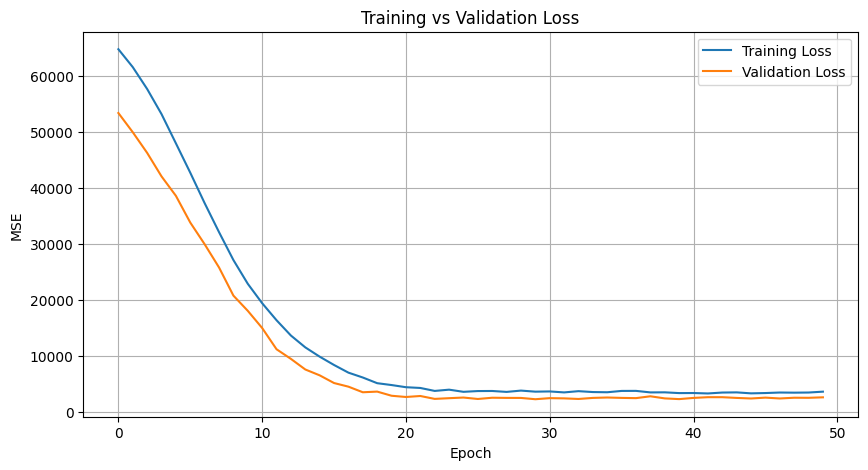

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

def mape(y_true, y_pred):
    y_true = np.array(y_true).reshape(-1)
    y_pred = np.array(y_pred).reshape(-1)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

y_val_pred = model.predict(X_val_scaled)

val_mape = mape(y_val, y_val_pred)
print(f"Validation MAPE (overall): {val_mape:.2f}%")



38/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation MAPE (overall): 21.46%


In [ ]:
val_results = val_data.copy()
val_results['y_true'] = y_val.values
val_results['y_pred'] = model.predict(X_val_scaled).flatten()

for wg in [
    'WarengruppeBread',
    'WarengruppeRolls',
    'WarengruppeCroissants',
    'WarengruppeConfectionery',
    'WarengruppeCake',
    'WarengruppeSeasonalBread'
]:
    subset = val_results[val_results[wg] == 1]
    mape_wg = mape(subset['y_true'], subset['y_pred'])
    print(f"{wg}: {mape_wg:.2f}%")



58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
WarengruppeBread: 20.02%
WarengruppeRolls: 16.28%
WarengruppeCroissants: 21.84%
WarengruppeConfectionery: 27.42%
WarengruppeCake: 16.10%
WarengruppeSeasonalBread: 57.13%


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Vorhersagen machen
y_train_pred = model.predict(X_train_scaled).flatten()
y_val_pred = model.predict(X_val_scaled).flatten()

# Metriken berechnen
def evaluate_model(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    print(f"\n{dataset_name}:")
    print(f"  MAE:  {mae:.2f} € (durchschnittlicher Fehler)")
    print(f"  RMSE: {rmse:.2f} € (bestraft große Fehler stärker)")
    print(f"  R²:   {r2:.3f} (0-1, höher = besser)")
    print(f"  MAPE: {mape:.2f} % (Fehler in Prozent)")

evaluate_model(y_train, y_train_pred, "Training")
evaluate_model(y_val, y_val_pred, "Validation")

  1/234 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step

234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

Training:
  MAE:  28.90 € (durchschnittlicher Fehler)
  RMSE: 42.04 € (bestraft große Fehler stärker)
  R²:   0.919 (0-1, höher = besser)
  MAPE: 17.65 % (Fehler in Prozent)

Validation:
  MAE:  34.49 € (durchschnittlicher Fehler)
  RMSE: 51.48 € (bestraft große Fehler stärker)
  R²:   0.844 (0-1, höher = besser)
  MAPE: 21.46 % (Fehler in Prozent)


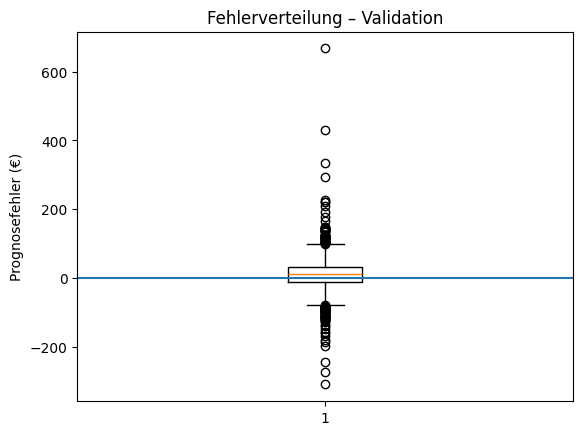

<Figure size 640x480 with 0 Axes>

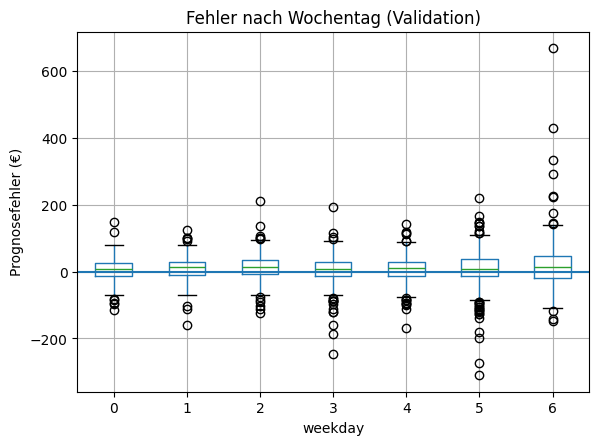

In [ ]:

# Fehler berechnen
train_errors = y_train_pred - y_train
val_errors   = y_val_pred   - y_val

import matplotlib.pyplot as plt

plt.figure()
plt.boxplot(val_errors)
plt.axhline(0)
plt.ylabel("Prognosefehler (€)")
plt.title("Fehlerverteilung – Validation")
plt.show()

import pandas as pd

df_val = val_data.copy()
df_val["weekday"] = pd.to_datetime(df_val["Datum"]).dt.weekday
weekday_val = df_val["weekday"]

df_val_plot = pd.DataFrame({
    "error": val_errors,
    "weekday": weekday_val
})

plt.figure()
df_val_plot.boxplot(column="error", by="weekday")
plt.axhline(0)
plt.ylabel("Prognosefehler (€)")
plt.title("Fehler nach Wochentag (Validation)")
plt.suptitle("")
plt.show()


--> Modell schlecht mit Sonntagen --> LAG Features einbauen